1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- MaxHR: Maximum heart rate achieved. Has data type $int64$, numeric value from 60 to 202.
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- ca: number of major vessels (0-3) colored by flourosopy - given
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

## Load Dataset

In [ ]:
import pandas as pd
import numpy as np

PATH = "/content/heart.csv"

df = pd.read_csv(PATH)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
882,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
883,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
884,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

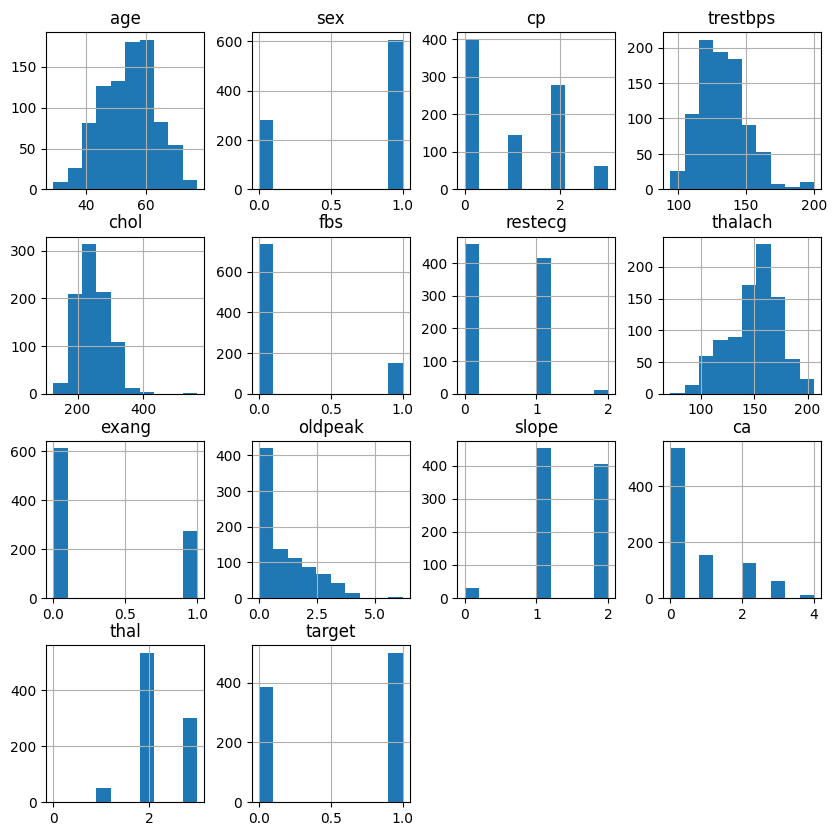

In [ ]:
#show histogram of dataframe
df.hist(figsize=(10,10))

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,54.007901,0.683973,1.005643,132.117381,247.497743,0.168172,0.495485,149.492099,0.310384,1.083296,1.424379,0.714447,2.278781,0.564334
std,9.126292,0.465186,1.024542,16.807511,47.209995,0.374230,0.526669,23.921327,0.462912,1.147935,0.556861,1.028825,0.572576,0.496124
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,245.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,206.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Lấy các cột thuộc loại category và continuous để xử lý 
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
continuous_columns = list(df.columns.drop(categorical_columns))
print(continuous_columns)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


## Data Analysis

<Axes: xlabel='target', ylabel='count'>

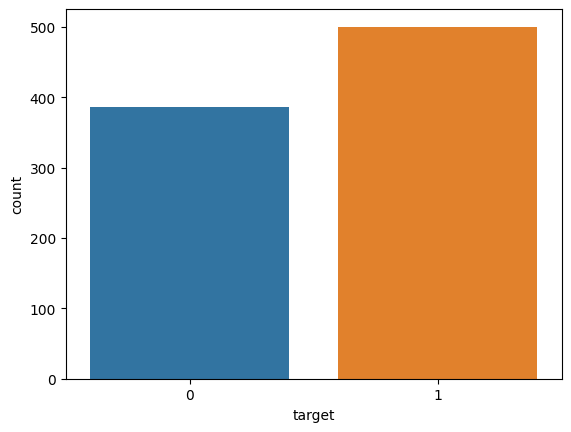

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='target', data=df)
#có thể nói dữ liệu tương đối cân bằng

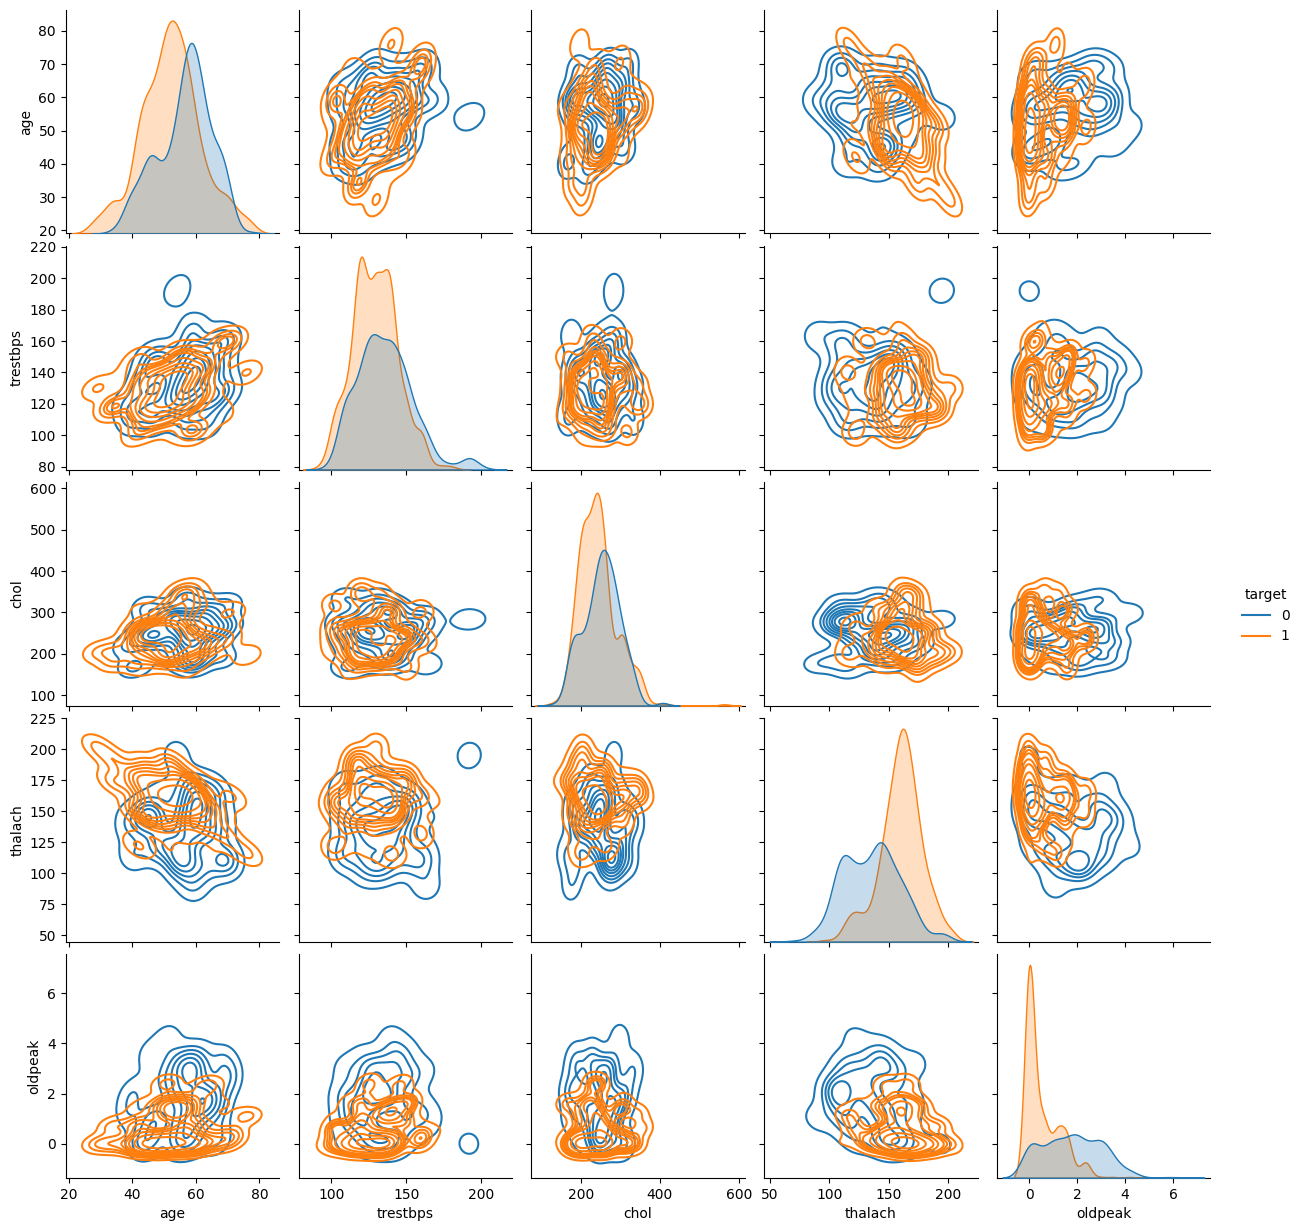

In [ ]:
sns.pairplot(df.drop(categorical_features, axis=1), hue='target', kind='kde')

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


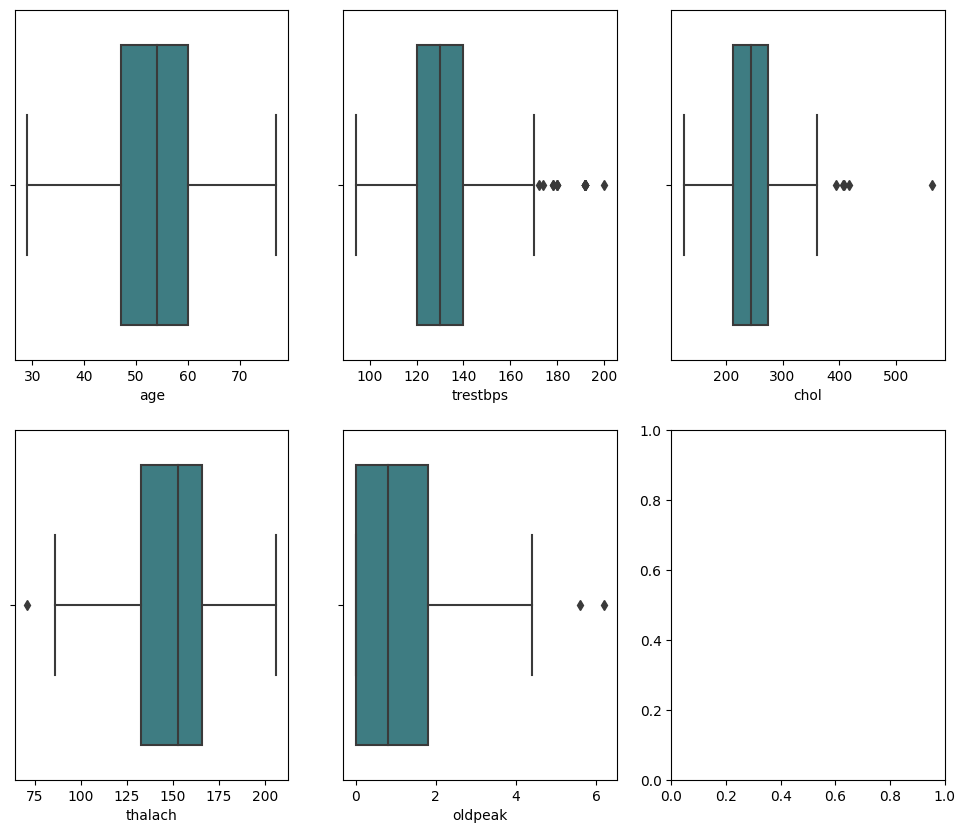

In [ ]:
import math
#Vẽ boxplot cho các continuous features
def draw_boxplot(df, cols, n_rows):
  n_cols = math.ceil(len(cols)/n_rows)
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(12,10), sharex=False, sharey=False) 
  for i, col in enumerate(cols):
    sns.boxplot(data=df, x=col, palette='crest', ax=axes[i//(math.ceil(len(cols)/n_rows)), i%n_cols])

print(continuous_columns)
draw_boxplot(df, continuous_columns,2)

In [ ]:
#remove outliers if required
def remove_outliers(df, outlier_cols):
  for col in outlier_cols:
    iqr = (df[col].quantile(0.75) - df[col].quantile(0.25))
    upper = df[col].quantile(0.75) + 1.5*iqr
    lower = df[col].quantile(0.25) - 1.5*iqr
    df = df.drop((df[(df[col] >= upper) | (df[col] <= lower)]).index)
  return df
temp = remove_outliers(df, continuous_columns)
print(temp) #ở đây ta không loại bỏ các outliers

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     46    1   0       120   249    0        0      144      0      0.8   
1     71    0   1       160   302    0        1      162      0      0.4   
2     71    0   1       160   303    0        1      163      0      0.4   
3     71    0   1       160   304    0        1      164      0      0.4   
4     71    0   1       160   305    0        1      165      0      0.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
881   68    0   2       120   211    0        0      115      0      1.5   
882   44    0   2       108   141    0        1      175      0      0.6   
883   52    1   0       128   255    0        1      161      1      0.0   
884   59    1   3       160   273    0        0      125      0      0.0   
885   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   0     3       0  
1        2   2     2     

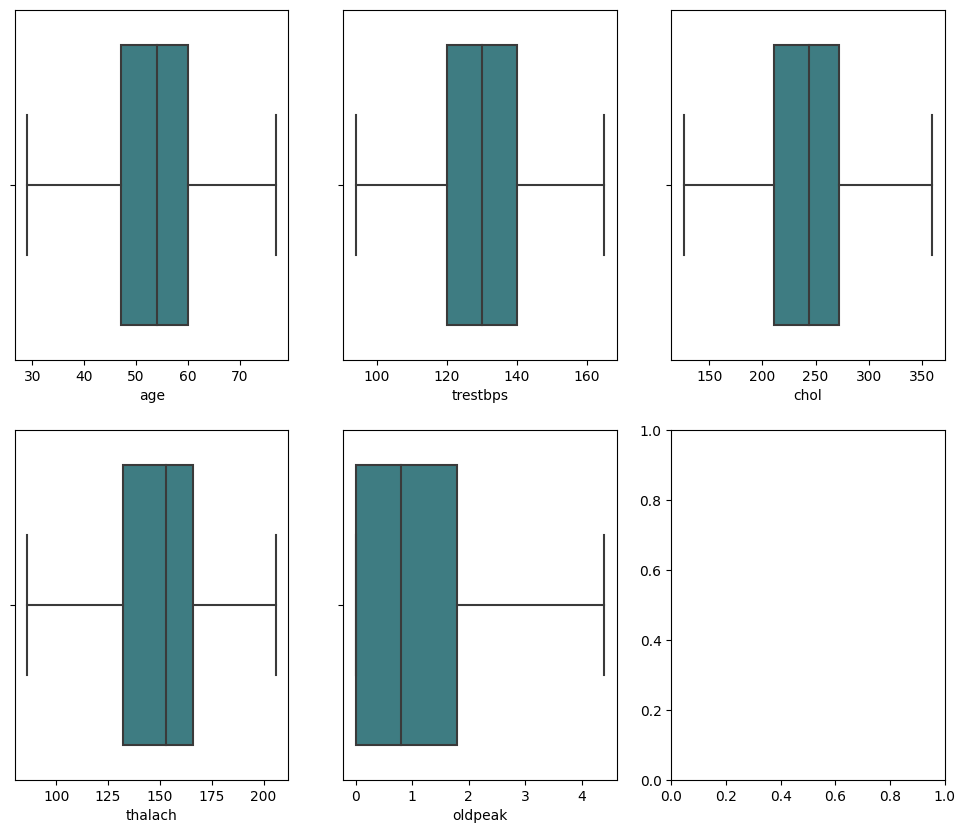

In [ ]:
#Kết quả sau khi loại bỏ outlier (nếu có)
draw_boxplot(temp, continuous_columns,2)

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
882,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
883,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
884,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


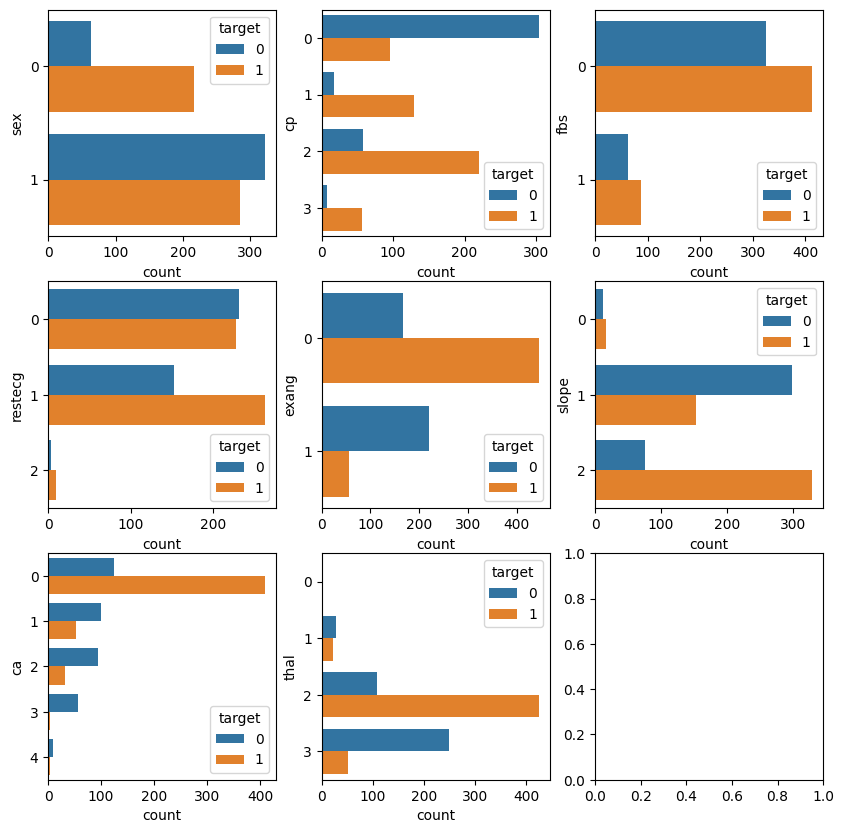

In [ ]:
print(categorical_features)
def draw_countplot(df, cols, n_rows):
  n_cols = math.ceil(len(cols)/n_rows)
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(10,10), sharex=False, sharey=False) 
  for i, col in enumerate(cols):
    sns.countplot(data=df, y=col, hue='target', ax=axes[i//(math.ceil(len(cols)/n_rows)), i%n_cols])
draw_countplot(df, categorical_features, 3)

<Axes: >

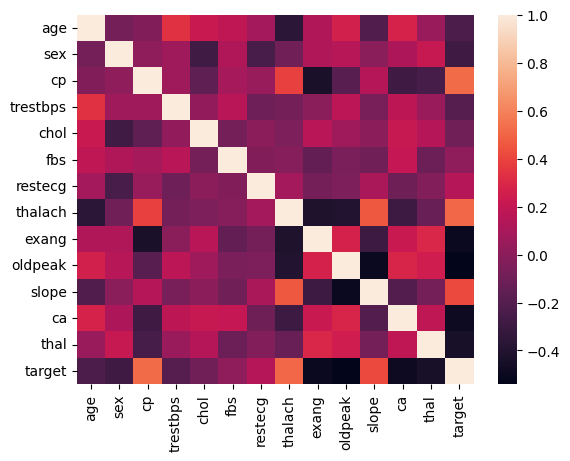

In [ ]:
sns.heatmap(df.corr())

## Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


In [ ]:
def preprocessing_data(df):
    
    # Todo: preprocess data
    df.dropna(inplace=True)
    return df

In [ ]:
df = preprocessing_data(df.copy())

## Feature Engineering

<Axes: >

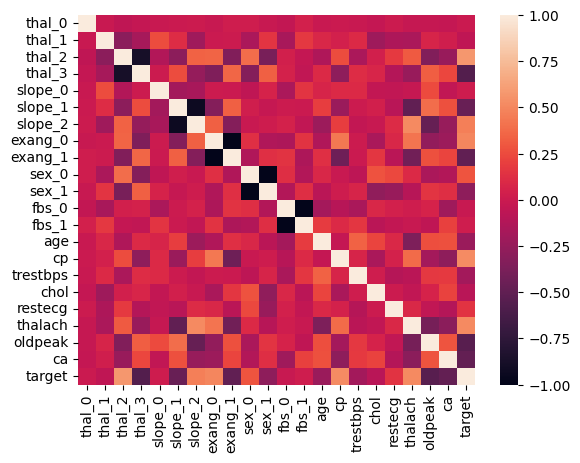

In [ ]:
# Heatmap
import seaborn as sns
#test
def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    col = ['thal', 'slope', 'exang', 'sex', 'fbs'] #các feature không có tính thứ tự
    df[col] = df[col].astype('category')
    temp =  pd.get_dummies(df[col])
    df.drop(col, axis=1, inplace=True)
    df = pd.concat([temp, df], axis=1)
    return df

df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [ ]:
df

,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,exang_0,exang_1,sex_0,...,fbs_1,age,cp,trestbps,chol,restecg,thalach,oldpeak,ca,target
0,0,0,0,1,0,0,1,1,0,0,...,0,46,0,120,249,0,144,0.8,0,0
1,0,0,1,0,0,0,1,1,0,1,...,0,71,1,160,302,1,162,0.4,2,1
2,0,0,1,0,0,0,1,1,0,1,...,0,71,1,160,303,1,163,0.4,2,1
3,0,0,1,0,0,0,1,1,0,1,...,0,71,1,160,304,1,164,0.4,2,1
4,0,0,1,0,0,0,1,1,0,1,...,0,71,1,160,305,1,165,0.4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,0,0,1,0,0,1,0,1,0,1,...,0,68,2,120,211,0,115,1.5,0,1
882,0,0,1,0,0,1,0,1,0,1,...,0,44,2,108,141,1,175,0.6,0,1
883,0,0,0,1,0,0,1,0,1,0,...,0,52,0,128,255,1,161,0.0,1,0
884,0,0,1,0,0,0,1,1,0,0,...,0,59,3,160,273,0,125,0.0,0,0


In [ ]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop('target', axis=1).values # Todo: Select features
    y = df['target'].values # Todo: Select label
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 1
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [ ]:
print(trainX.shape)
print(testX.shape)

(620, 21)
(266, 21)


## Build SK-learn model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    scaler = StandardScaler()
    model = LogisticRegression(solver='liblinear')
    
    # Todo: Input your scaler and logistic model into pipeline
    pipeline = Pipeline(steps=[
        ('scaler', scaler),
        ('model', model)
    ])
    params_grid = {
        'model__penalty': ['l1', 'l2']
    }
    # Todo: fit your model with X, y
    grid = GridSearchCV(pipeline, params_grid)
    grid.fit(X,y)
    return grid

def calculate_performance(y_true, y_pred):
    """
    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """

    print("precision", precision_score(y_true, y_pred))
    print("recall", recall_score(y_true, y_pred))
    print("accuracy", accuracy_score(y_true, y_pred))
    print("F1", f1_score(y_true, y_pred))

    print('main score:')
    main_score = recall_score(y_true, y_pred) 
    return main_score

model = build_model(trainX, trainY)
print('model best params:', model.best_params_)
# Compare on training dataset
pred = model.predict(trainX)
print('train set:')
print(calculate_performance(trainY, pred)) 
print('\ntest set')
pred = model.predict(testX)
print(calculate_performance(testY, pred))

model best params: {'model__penalty': 'l2'}
train set:
precision 0.9583333333333334
recall 0.9745762711864406
accuracy 0.9612903225806452
F1 0.9663865546218487
main score:
0.9745762711864406

test set
precision 0.9527027027027027
recall 0.9657534246575342
accuracy 0.9548872180451128
F1 0.9591836734693877
main score:
0.9657534246575342


In [ ]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    opinion = "Recall là metric chính, vì bài toán này là dự đoán những người có dấu hiệu bệnh tim, vì thế mục tiêu của ta nên là cố gắng phát hiện được nhiều người có dấu hiệu mắc bệnh tim nhất có thể, từ đó có thể tiến hành khám chuyên sâu. Other conclusion: solver chính là liblinear, vì solver này thích hợp cho tập dataset nhỏ (ở đây là tập heart.csv với 886 dòng), penalty chính là l2 vì có kết quả tốt hơn l1"
    return opinion

get_conclusion()

'Recall là metric chính, vì bài toán này là dự đoán những người có dấu hiệu bệnh tim, vì thế mục tiêu của ta nên là cố gắng phát hiện được nhiều người có dấu hiệu mắc bệnh tim nhất có thể, từ đó có thể tiến hành khám chuyên sâu. Other conclusion: solver chính là liblinear, vì solver này thích hợp cho tập dataset nhỏ (ở đây là tập heart.csv với 886 dòng), penalty chính là l2 vì có kết quả tốt hơn l1'